# **DS 3000 - Practicum #2**

**Group Members**: Adrian Grullon, Erika Sohn, Gavin Bond, and Om Prajapati

**Date**: 6/14/2025

# **Practicum 2: Model Development and Tuning**

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind

# File name
diabetes_file = 'diabetes_012_health_indicators_BRFSS2015.csv'

## Question 1: The DS Problem

In your own words, formulate the Data Science problem.

Using data from the 2015 Behavioral Risk Factor Surveillance System (BRFSS), our goal is to solve a multi-class classification problem: predicting an individual’s diabetes status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes) based on lifestyle, demographic, and clinical features. We aim to identify meaningful predictors, evaluate their statistical significance, visualize key relationships, and develop machine learning models that can accurately classify individuals by diabetes risk. This analysis can support early screening and prevention efforts in public health.

## Question 2: Prepare the Data
- Evaluate the dataset to determine if **ALL variables are represented in their expected type**. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.


In [10]:
# Pulling the csv into a dataframe and viewing a sample
diabetes_df = pd.read_csv(diabetes_file)
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [88]:
# Viewing the data dimensions
print(f"Dataset rows: {diabetes_df.shape[0]}")
print(f"Dataset columns: {diabetes_df.shape[1]}")

Dataset rows: 253680
Dataset columns: 22


Once we load the data and take a quick look ahead we see that this Dataframe contains 253,680 entries. We also see that there are 22 different columns with attributes for different Americans. The attributes are:
- **Diabetes_012** - A ternary indicator of which stage of diabetes an individuals is at (0 = No Diabetes, 1 = Prediabetic, 2 = Diabetic).
- **HighBP** - A binary indicator that details if an individual has high blood pressure or not. (0 = No High Blood Pressure, 1 = High Blood Pressure).
- **HighChol** - A another binary indicator that details if an individual has a high cholesterol level. (0 = Non-high Cholesterol Level, 1 = High Cholesterol Levels).
- **CholChec**k** -
- **BMI** - An individuals Body Mass Index.
- **Smoker** - A binary indicator to which checks if an individuals has smoked at least 100 cigarettes in their entire life (5 Packs).
- **Stroke** - A binary indicator that determines if this individuals has had a stroke (0 = No, 1 = Yes).
- **HeartDiseaseorAttack** - A binary indicator that tells if this individuals has coronary heart disease (CHD) or myocardial infarction (0 = No, 1 = Yes).
- **PhysActivity** - A  binary indicator that determines if this individuals has had physical activity with the inclusion their job (0 = No, 1 = Yes).
- **Fruits** - A  binary indicator that determines if this individuals consumes at least one fruit a day (0 = No, 1 = Yes).
- **Veggies** - A  binary indicator that determines if this individuals consumes at least one vegetable a day (0 = No, 1 = Yes).
- **HeavyAlcoholConsump** - A binary indicator that determines if this individuals can be considered to have a heavy alcohol consumption (0 = No, 1 = Yes).
- **AnyHealthCare** - A binary indicator that determines if this individual has some sort of health coverage (0 = No, 1 = Yes)
- **NoDocbcCost** - A binary indicator to see if there was a time where an individual that had to see the doctor could no afford it. (0 = No, 1 = Yes).
- **GenHlth** - A 1-5 scale for general health (1 = Excellent, 5 = Poor).
- **MentlHlth** - A 1-5 scale for mental health (1 = Excellent, 5 = Poor).
- **PhysHlth** - A 1-5 scale for physical health (1 = Excellent, 5 = Poor).
- **DiffWalk** - A binary indicator to see if this individual has serious difficulty walking. (0 = No, 1 = Yes).
- **Sex** - A Binary indicator of sex (0 = Female, 1 = Male).
- **Age** - A 13-level age category (1 = 18-24, 9 = 60-64, 13 = 80 or older)
- **Education** - a Education level scale from 1 - 6 (1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary)).
 **Income** - a Income scale from scale 1 - 8 (1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more).


In [12]:
df = diabetes_df.copy() # df = cleaned df

In [13]:
print("\nInitial data types:")
print(df.dtypes)

# Sanity Check: no missing vals
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")



Initial data types:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Checking for missing values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity           

In [53]:
# Identify variable types
print("Identifying variable types:")
# The only continuous variable is BMI, all others are continous
continuous_vars = ['BMI']
categorical_vars = [col for col in df.columns if col != 'BMI']

print(f"Continuous variables: {continuous_vars}")
print(f"Categorical variables: {categorical_vars}")

Identifying variable types:
Continuous variables: ['BMI']
Categorical variables: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


After quickly looking at the data we first see that there are **no** missing values for any of the columns. This is good because it means that we technically have all the possible information that we could extract from this Dataframe without dropping any values. At the same time we also see that essentially every category of this data happens to be qualitative except for **BMI**. This means that although BMI is already in its correct data type as a float since it is **continous data**, we must change every other attribute to be an **integer** in order for them to be properly represented as either **nominal or ordinal data**.

In [54]:
# Convert categorical data to appropriate int64 type, keep BMI as float64 since continous
for col in categorical_vars:
    df[col] = df[col].astype('int64')

In [55]:
# Sanity check: all categorical/discrete data converted to int64, BMI kept as float64
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Diabetes_012              int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object


In [56]:
# Sanity check: no invalid values; all categorical/discrete
print("Check for invalid values in categorical variables:")
for col in categorical_vars:
    unique_values = df[col].unique()
    print(f"{col}: {sorted(unique_values)}")

Check for invalid values in categorical variables:
Diabetes_012: [np.int64(0), np.int64(1), np.int64(2)]
HighBP: [np.int64(0), np.int64(1)]
HighChol: [np.int64(0), np.int64(1)]
CholCheck: [np.int64(0), np.int64(1)]
Smoker: [np.int64(0), np.int64(1)]
Stroke: [np.int64(0), np.int64(1)]
HeartDiseaseorAttack: [np.int64(0), np.int64(1)]
PhysActivity: [np.int64(0), np.int64(1)]
Fruits: [np.int64(0), np.int64(1)]
Veggies: [np.int64(0), np.int64(1)]
HvyAlcoholConsump: [np.int64(0), np.int64(1)]
AnyHealthcare: [np.int64(0), np.int64(1)]
NoDocbcCost: [np.int64(0), np.int64(1)]
GenHlth: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
MentHlth: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), 

From the categorical values above, we can see there are no invalid values. They are all either categorical and/or discrete.

In [57]:
# Check BMI for outliers
print("Checking BMI for outliers:")
bmi_stats = df['BMI'].describe()
print(bmi_stats)

Checking BMI for outliers:
count    253680.000000
mean         28.107247
std           5.562154
min          13.500000
25%          24.000000
50%          27.000000
75%          31.000000
max          41.500000
Name: BMI, dtype: float64


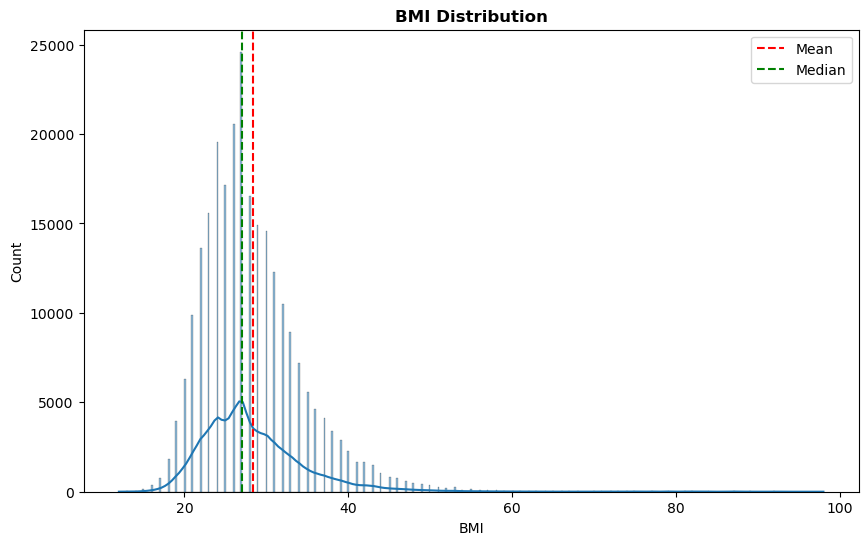

In [19]:
# Visualize BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution', fontweight='bold')
plt.xlabel('BMI')
plt.axvline(df['BMI'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['BMI'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

The mean BMI of 28.38 falls within the **overweight range** according to national health guidelines. However, the presence of a low value of 12.00 and an extreme value of 98.00 suggests potential outliers, which may result from either biological extremes or data entry errors. The histogram reveals a **positively skewed** distribution, with most data points clustered at the lower end and a long tail extending to higher BMI values. Given this skew and the presence of outliers, capping will be necessary to ensure balanced input for modeling in this stage of our analysis.

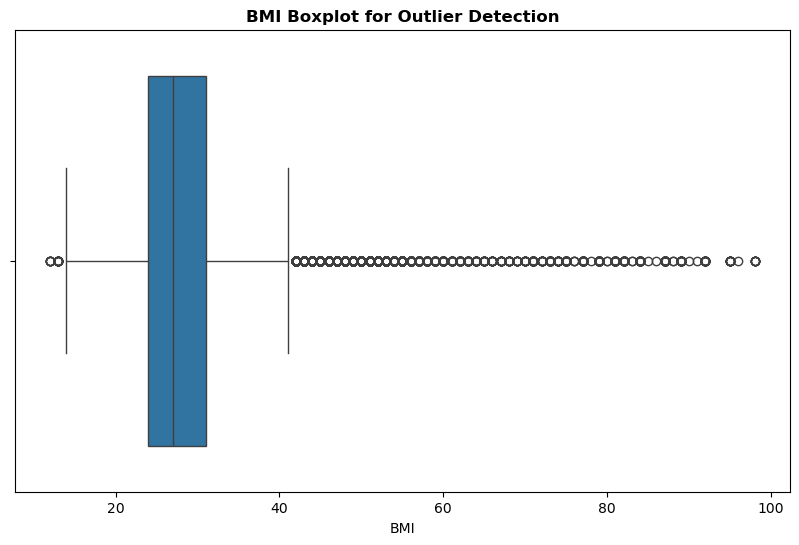

In [20]:
# Box plot for BMI to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BMI'])
plt.title('BMI Boxplot for Outlier Detection', fontweight='bold')
plt.xlabel('BMI')
plt.show()

In [21]:
# Calculate IQR for BMI to identify outliers
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nBMI IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


BMI IQR: 7.0
Lower bound: 13.5
Upper bound: 41.5


In [22]:
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(f"Number of BMI outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")

Number of BMI outliers: 9847
Percentage of outliers: 3.88%


Using the IQR method for outlier detection, we calculated an IQR of 7.0 for BMI, resulting in a lower bound of 13.5 and an upper bound of 41.5. Any BMI values outside this range are considered outliers and may indicate data entry errors or biologically extreme cases. From our earlier analysis, we observed a minimum BMI of 12.0 and a maximum of 98.0, both of which **fall well outside the calculated bounds**. We also found that the percentage of outliers in our dataset is 3.88%, which suggests that while most values fall within a reasonable range, a small but notable portion may require further inspection or preprocessing.

In [58]:
print("Outliers in BMI:")
print(f"Before capping - Min: {df['BMI'].min()}, Max: {df['BMI'].max()}")

Outliers in BMI:
Before capping - Min: 13.5, Max: 41.5


In [59]:
df_cleaned = df.copy()

# First: cap bounds
df_cleaned['BMI'] = df_cleaned['BMI'].clip(lower=lower_bound, upper=upper_bound)

print(f"After capping - Min: {df_cleaned['BMI'].min()}, Max: {df_cleaned['BMI'].max()}")
print(f"Number of values capped: {len(outliers)}")

After capping - Min: 13.5, Max: 41.5
Number of values capped: 9847


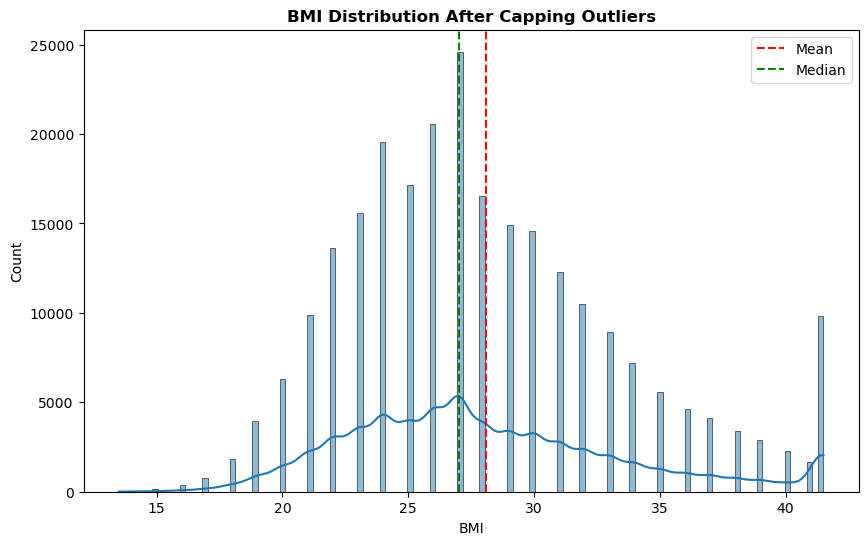

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['BMI'], kde=True)
plt.title('BMI Distribution After Capping Outliers', fontweight='bold')
plt.xlabel('BMI')
plt.axvline(df_cleaned['BMI'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_cleaned['BMI'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

**We can see the distribution has normalized**, given all the cleaning we did:
1. All variables converted to their appropriate dtypes (BMI: float64, categorical/binary: int64)
2. Missing values: none were found in the dataset
3. Invalid values: no invalid values found in categorical variables
4. Outliers: identified 3.88% BMI outliers using the IQR method and capped to normalize data

We can see the distribution has become normalized.
1. All variables were converted to their appropriate data types:
   - BMI: Kept as float64 (continuous variable)
   - All other variables: Converted to int64 (categorical/discrete variables)
2. Missing values: None found in the dataset
3. Invalid values: Checked for out-of-range values in categorical variables
4. Outliers: Identified and capped BMI outliers using the IQR method
   - 9847 outliers (3.88% of data) were capped

In [26]:
print(f"Cleaned dataset rows: {df_cleaned.shape[0]}")
print(f"Cleaned dataset columns: {df_cleaned.shape[1]}")

Cleaned dataset rows: 253680
Cleaned dataset columns: 22


Now that all the data is in the correct data type we can continue onto **EDA** in which we can just analyze a few relationships as well as visualizing some of the data.

## Question 3
Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

For this analysis, we selected **5 key variables** to explore based on their relevance to diabetic outcomes, univariate and bivariate:

1. Diabetes_012, the target variable, to understand class distribution and assess any imbalance.

2. BMI was included due to its well-established link to metabolic health and visible upward trends across diabetes categories.

3. HighBP (hypertension) was examined , as it is a common comorbidity and clinical risk factor for diabetes.

4. MentHlth was chosen to explore the role of psychological well-being, as chronic mental distress may influence physical health behaviors.

5. PhysActivity to assess how regular exercise (or a lack of it) correlates with diabetes risk.

In [89]:
df = df_cleaned.copy()

print("Summary Statistics:")
print(df.describe())

Summary Statistics:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.107247       0.443169       0.040571              0.094186   
std         5.562154       0.496761       0.197294              0.292087   
min        13.500000       0.000000       0.000000    

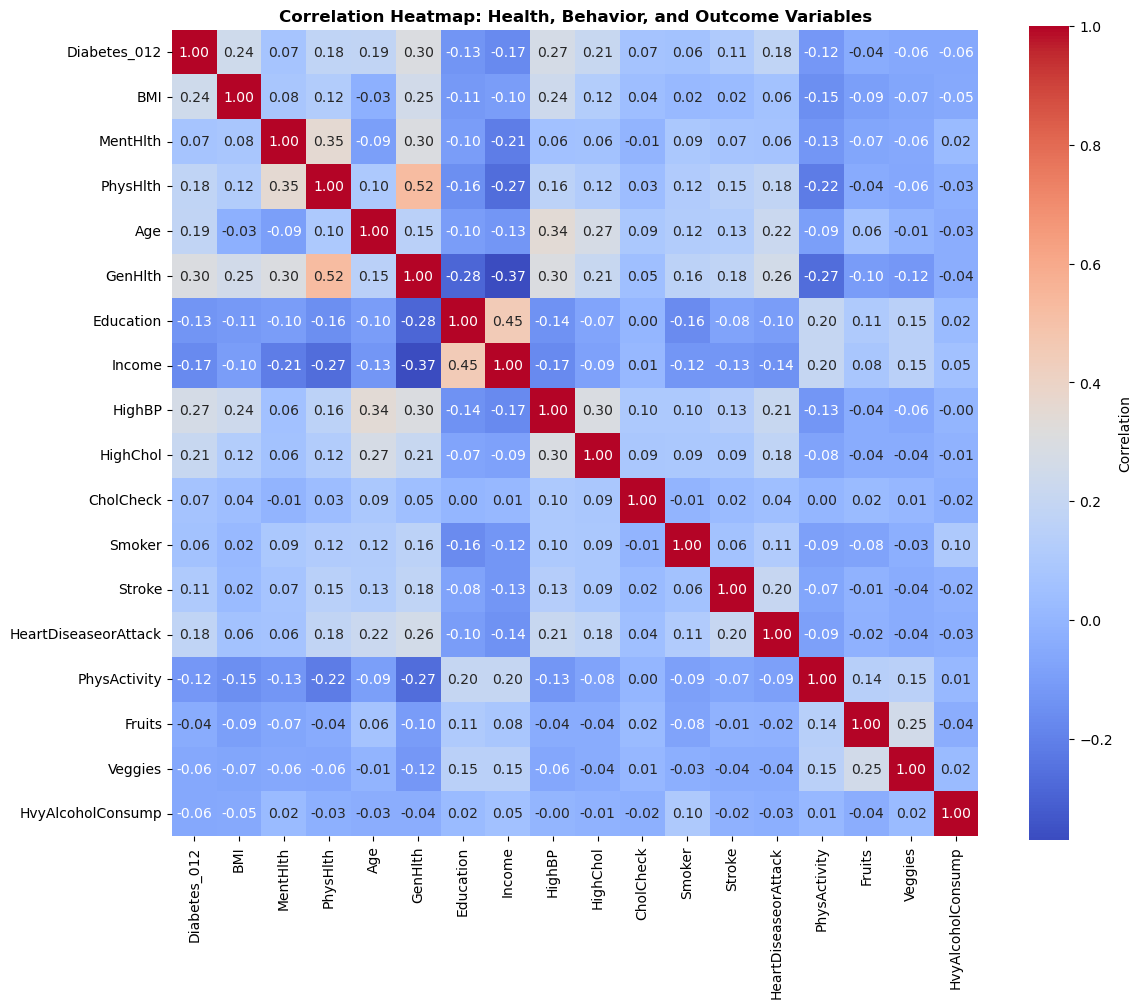

In [28]:
selected_vars = df[[
    'Diabetes_012', 'BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth',
    'Education', 'Income', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump'
]]

# Compute correlation matrix
corr_matrix = selected_vars.corr()

# Plot standard heatmap (no clustering)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            cbar_kws={'label': 'Correlation'}, square=True)

plt.title('Correlation Heatmap: Health, Behavior, and Outcome Variables', fontweight='bold')
plt.tight_layout()
plt.show()

The heatmap above may appear hectic at first glance. However, we chose to generate it before diving into univariate and pairwise analyses to gain a bird’s-eye view of potential relationships across all variables. This helps us to strategically select which features to explore further. We found:
- **MentHlth and PhysHlth** are moderately correlated (r = 0.35)

- **GenHlth** is linked to both physical and mental health (r ≈ 0.3–0.5)

- **Income and Education** show weak correlations with health indicators

- **Diabetes_012** is most positively correlated with:
    - HighBP (r = 0.27)
    - BMI (r = 0.24)
    - HeartDiseaseorAttack (r = 0.18)

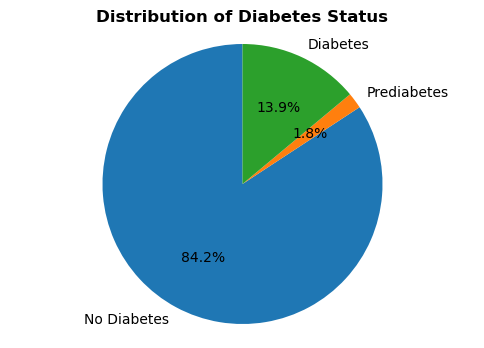

In [29]:
# PLOT 1: pie chart distribution of diabetes status
diabetes_counts = df['Diabetes_012'].value_counts().sort_index()
labels = ['No Diabetes', 'Prediabetes', 'Diabetes']

plt.figure(figsize=(6, 4))
plt.pie(diabetes_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Status', fontweight='bold')
plt.axis('equal')
plt.show()

In [30]:
print("Diabetes status distribution:")
for i, label in enumerate(labels):
    print(f"{label}: {diabetes_counts[i]} ({diabetes_counts[i]/len(df)*100:.1f}%)")


Diabetes status distribution:
No Diabetes: 213703 (84.2%)
Prediabetes: 4631 (1.8%)
Diabetes: 35346 (13.9%)


The pie chart illustrates the distribution of diabetes status within the dataset across 3 categories: No Diabetes, Prediabetes, and Diabetes. A substantial **majority of individuals fall into the 'No Diabetes' group** (84.2%), followed by a smaller proportion with prediabetes (13.9%), and the smallest segment representing diagnosed diabetes cases (1.8%).

/var/folders/j6/sg1vtjtn51g0yk2lj2zjvw8m0000gn/T/ipykernel_91387/28938591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='viridis')


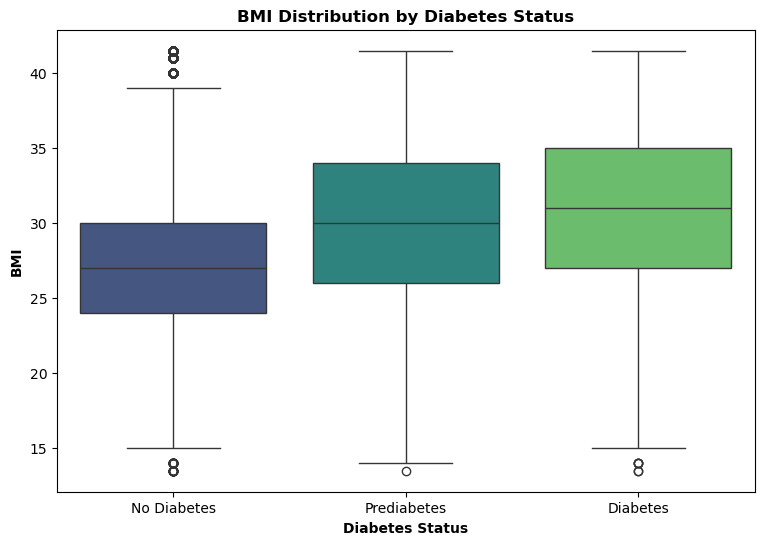

In [31]:
# PLOT 2: distribution of poor mental health days
plt.figure(figsize=(9, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='viridis')
plt.title('BMI Distribution by Diabetes Status', fontweight='bold')
plt.xlabel('Diabetes Status', fontweight='bold')
plt.ylabel('BMI', fontweight='bold')
plt.xticks([0, 1, 2], labels=labels)
plt.show()

This boxplot demonstrates a **positive association** between higher BMI and diabetes risk. All three groups have a similar interquartile range (IQR), but the no-diabetes and diabetes groups display more extreme high outliers, indicating individuals with significantly elevated BMI values beyond 40. Overall, the plot supports BMI as a relevant and non-redundant feature for predicting diabetic outcomes.

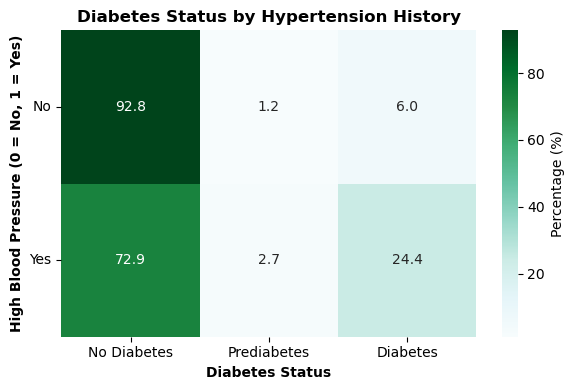

In [32]:
# PLOT 3: diabetes status by hypertension history
highbp_pct = pd.crosstab(df['HighBP'], df['Diabetes_012'], normalize='index') * 100

plt.figure(figsize=(6, 4))
sns.heatmap(highbp_pct, annot=True, fmt=".1f", cmap="BuGn", cbar_kws={'label': 'Percentage (%)'})
plt.title('Diabetes Status by Hypertension History', fontweight='bold')
plt.xlabel('Diabetes Status', fontweight='bold')
plt.ylabel('High Blood Pressure (0 = No, 1 = Yes)', fontweight='bold')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['No Diabetes', 'Prediabetes', 'Diabetes'], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

There is strong medical evidence that hypertension is a major contributor to diabetes, as both are core components of metabolic syndrome, a cluster of conditions that increase the risk of cardiovascular disease and type II diabetes. The heatmap clearly shows that **individuals with high blood pressure have a substantially higher percentage of diabetes (24.4%)** compared to those without hypertension (6.0%). This relationship reflects how chronic elevated blood pressure can impair insulin signaling and promote insulin resistance over time.

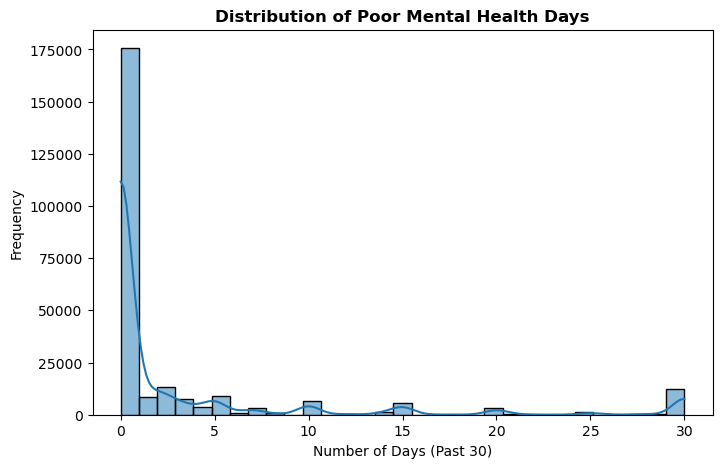

In [33]:
# PLOT 4: distribution of poor mental health days
plt.figure(figsize=(8, 5))
sns.histplot(df['MentHlth'], bins=31, kde=True)
plt.title('Distribution of Poor Mental Health Days', fontweight='bold')
plt.xlabel('Number of Days (Past 30)')
plt.ylabel('Frequency')
plt.show()

We were interested to see MentHlth included in the dataset and the potential role it could play in predicting diabetes outcomes. The distribution of poor mental health days over the past 30 days is highly skewed to the right, with **most people reporting 0 days of poor mental health**. A smaller subset of individuals report frequent mental health issues, with visible spikes at 10, 15, 20, and 30 days. This suggests possible patterns of chronic psychological conditions. This indicates that while the majority of the population maintains stable mental health, a notable minority may experience recurring or prolonged distress. Thus, hinting that including MentHlth as a feature may not be needed.

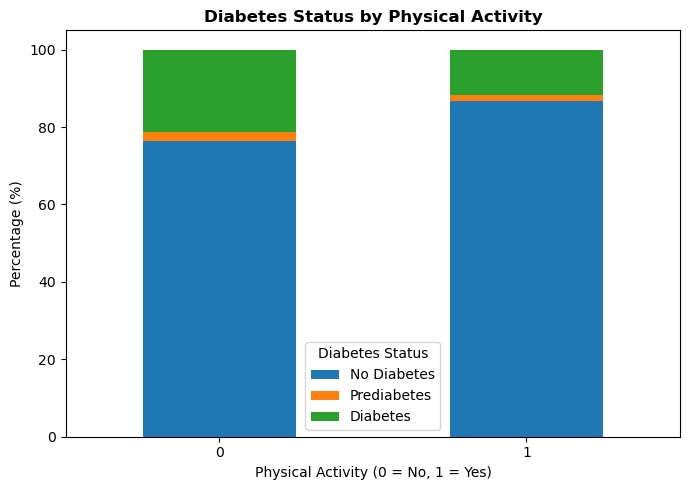

In [34]:
# PLOT 5: diabetes status by physical activity
physact_pct = pd.crosstab(df['PhysActivity'], df['Diabetes_012'], normalize='index') * 100

physact_pct.plot(kind='bar', stacked=True, figsize=(7, 5))

plt.title('Diabetes Status by Physical Activity', fontweight='bold')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked bar chart shows that individuals who do not engage in physical activity have a higher proportion of diabetes cases (approx. 22%) compared to those who are active (approx. 11%). This suggests a **negative association** between regular exercise and diabetes risk. It also highlights how behavioral factors, such as physical inactivity, may contribute to secondary physiological effects (i.e., increased BMI or blood pressure) raise the likelihood of developing diabetes

## Question 4a

- Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.


Note: if you are using correlations, ensure that this is only performed using continuous variables.

### **Hypotheses**
1.   BMI vs Diabetes Outcome
  - H0: The mean BMI is equal between individuals with no diabetes (0) and diagnosed diabetes (2).
  - H1: The mean BMI differs between individuals with no diabetes and diagnosed diabetes.
2. High Blood Pressure vs Diabetes Outcome
  - H0: Hypertension and diabetes status are independent.
  -  H1: There is a significant association between hypertension and diabetes status.
3. Physical Activity vs High Blood Pressure
  - H0: Physical activity and high blood pressure are independent.
  - H1: There is a significant association between physical activity and high blood pressure.


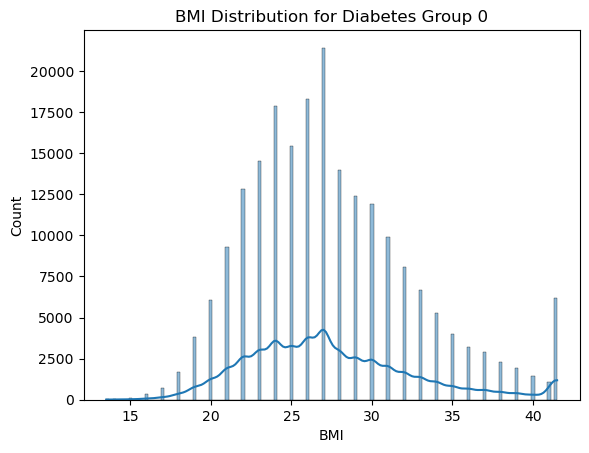

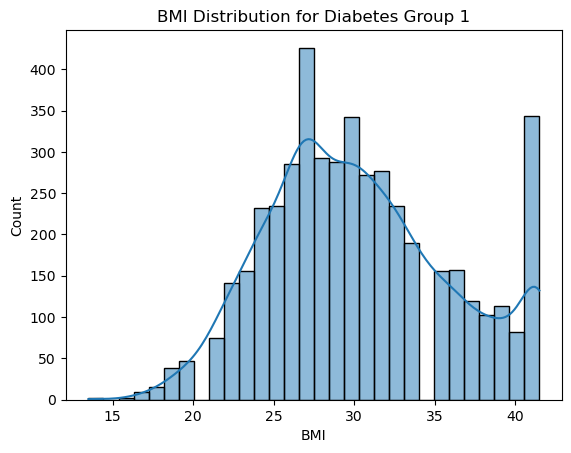

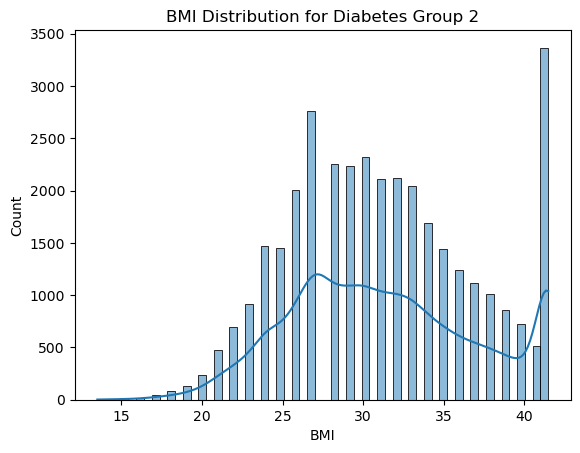

In [35]:
# Check if BMI data is normally distributed -> guide assumption making
for i in range(3):
    sns.histplot(df[df['Diabetes_012'] == i]['BMI'], kde=True)
    plt.title(f'BMI Distribution for Diabetes Group {i}')
    plt.xlabel('BMI')
    plt.show()

In [36]:
# T-test: BMI vs Diabetes Outcome (Diabetes=0, No Diabetes=2)

group_0_bmi = df[df['Diabetes_012'] == 0]['BMI']
group_2_bmi = df[df['Diabetes_012'] == 2]['BMI']

t_stat, p_val = ttest_ind(group_0_bmi, group_2_bmi, equal_var=False)

mean_0 = group_0_bmi.mean()
mean_2 = group_2_bmi.mean()

print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4e}")
print(f"Mean BMI (No Diabetes) = {mean_0:.2f}")
print(f"Mean BMI (Diabetes)     = {mean_2:.2f}")

T-test: t-statistic = -116.02, p-value = 0.0000e+00
Mean BMI (No Diabetes) = 27.52
Mean BMI (Diabetes)     = 31.35


**Assumptions:**
1.   Independence of groups: The two groups (No Diabetes and Diabetes) are independent and mutually exclusive
2.   Continous outcome variable: BMI is measured on a continous scale appropriate for tracking differences across both diabetes groups.
3.   Non-normal distribution: as demonstrated by right skewed BMI distributions above

**Hypotheses:**
- H0: The mean BMI is equal between individuals with no diabetes (0) and diagnosed diabetes (2)
- H1: The mean BMI differs between individuals with no diabetes and diagnosed diabetes.

Given that the Prediabetes group represents only 1.8% of the dataset, we excluded it to focus on a clearer comparison between the No Diabetes and Diabetes groups. The t-test yielded a large negative t-statistic (t = −116.02) and an extremely small p-value (p < 0.0001), confirming a **statistically significant** difference in mean BMI. Individuals without diabetes had a mean BMI of 27.52, compared to 31.35 for those with diabetes, a meaningful difference. These results support BMI as a potential risk factor, and we **reject the null hypothesis**.

In [37]:
# Chi^2: High Blood Pressure vs Diabetes Outcome
contingency = pd.crosstab(df['HighBP'], df['Diabetes_012'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi-square test - statistic: {chi2:.2f}, p-value: {p:.2e}")

Chi-square test - statistic: 18794.64, p-value: 0.00e+00


**Assumptions:**
1. The variables are categorical: binary for hypertension, ordinal for diabetes status
2. Observations are independent: each individual one represents a unique data point
3. Expected cell counts are sufficiently large: ensures validity of the chi-square approximation

**Hypotheses:**
- H0: Hypertension and diabetes status are independent.
- H1: There is a significant association between hypertension and diabetes status.

We used the Chi-square test to assess the relationship between hypertension (HighBP) and diabetes status (Diabetes_012), as both are categorical variables. The results (χ² = 18,794.64, p < 0.0001) provide **strong evidence to reject the null hypothesis**, confirming a statistically significant association. Individuals with hypertension are more likely to have diabetes, indicating a strong relationship within the population.

In [38]:
# Chi^2: Physical Activity vs Blood Pressure Outcome
contingency = pd.crosstab(df['PhysActivity'], df['HighBP'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi-square test - statistic: {chi2:.2f}, p-value: {p:.10f}")

Chi-square test - statistic: 3980.10, p-value: 0.0000000000


**Assumptions:**
1. Variables are categorical: both Physical Activity and HighBP are binary categorical variables (0 = No, 1 = Yes).
2. Observations are independent
3. Sample size is large enough: expected cell counts above minimum Chi^2 threshold (≥ 5)

**Hypotheses:**
- H0: Physical activity and high blood pressure are independent.
- H1: There is a significant association between physical activity and high blood pressure.

The test yielded a statistically significant result (χ² = 3,980.10, p < 0.0001), providing strong evidence to **reject the null hypothesis**. This suggests that physical activity is **meaningfully associated with blood pressure status**, potentially reflecting lifestyle related health patterns.The second Chi-square test evaluated the association between physical activity and high blood pressure (HighBP), based on the following hypotheses:

Note: Given the large dataset, p-values may appear as 0.00e+00 due to extremely small values approaching zero. While this indicates statistical significance, practical significance should be evaluated through effect sizes or domain relevance.

In [39]:
corr_matrix = df.corr()

# Select features only if they meet r^2 threshold
diabetes_corr = corr_matrix['Diabetes_012'].abs().sort_values(ascending=False) # abs so checks for + and -
selected_features = diabetes_corr[diabetes_corr >= 0.15].index.tolist()

# Remove the target itself
selected_features.remove('Diabetes_012')

print("Selected features based on correlation threshold:")
print(selected_features)

Selected features based on correlation threshold:
['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income']


Using multiple determinants (including medical, statistical, and logical reasoning from our analysis) we have selected **9 features** for inclusion in our model. Given the large sample size (>250,000 entries) from the CDC Diabetes dataset, this feature set is appropriate to **prevent overfitting**:
1. **GenHlth (r = 0.30)**
    - A self-reported measure of general health
    - Strongly correlated with diabetes status and captures both physical and mental well-being
    - Acts as a holistic health signal
2. **HighBP (r = 0.27)**
    - Hypertension is a well-documented clinical risk factor for type 2 diabetes and part of the broader metabolic syndrome
    - Chi-square test confirms significant association (p < 0.0001)

3. **BMI (r = 0.24)**
    - Shows a clear increasing trend across diabetes classes in the boxplot
    - Statistically significant (ANOVA p < 0.0001), reaffirming its importance as a metabolic indicator

4. **DiffWalk (r = 0.22)**
    - Difficulty walking is a proxy for reduced mobility or chronic health decline—often associated with complications of diabetes or related conditions

5. **HeartDiseaseorAttack (r = 0.18)**
    - Diabetes increases cardiovascular risk
    - This variable shows a positive association with diabetes and captures comorbid risk to highlight severity of disease

6. **PhysHlth (r = 0.18)**
    - Reflects physically unhealthy days in the past month
    - Moderately correlated with GenHlth and Diabetes_012, suggesting its role in indicating chronic disease burden

7. **Age (r = 0.19)**
    - A well-known diabetes risk factor
    - Visualizations showed higher prevalence in older age brackets, supporting its inclusion

8. **HighChol (r = 0.21)**
    - A key component of metabolic syndrome
    - Adds value alongside HighBP and BMI by reflecting lipid-related risk

9. **Income (r = –0.17)**
    - Negatively correlated with diabetes risk
    - Captures the influence of social determinants like healthcare access, nutrition, and stress

In [40]:
# Select features and target variable
X = df[['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HeartDiseaseorAttack',
        'PhysHlth', 'Age', 'HighChol', 'Income']]
y = df['Diabetes_012']

## Question 4b (BONUS)
(2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

In [41]:
# Create 3 diabetes groups
group_0 = df[df['Diabetes_012'] == 0]['GenHlth']
group_1 = df[df['Diabetes_012'] == 1]['GenHlth']
group_2 = df[df['Diabetes_012'] == 2]['GenHlth']

stat, p_value = kruskal(group_0, group_1, group_2)

print(f"Kruskal-Wallis test for GenHlth: H-stat = {stat:.2f}, p-value = {p_value:.4e}")

Kruskal-Wallis test for GenHlth: H-stat = 22480.93, p-value = 0.0000e+00


In [42]:
group_0 = df[df['Diabetes_012'] == 0]['MentHlth']
group_2 = df[df['Diabetes_012'] == 2]['MentHlth']

stat, p_value = mannwhitneyu(group_0, group_2, alternative='two-sided')

print(f"Mann-Whitney U test for MentHlth: U-stat = {stat:.2f}, p-value = {p_value:.4e}")

Mann-Whitney U test for MentHlth: U-stat = 3564682389.50, p-value = 1.0805e-95


1. **Kruskal-Wallis Test (GenHlth vs. Diabetes_012)**
We used the Kruskal-Wallis test to assess whether general health scores differ across diabetes status groups. This test is appropriate because GenHlth is an ordinal variable and Diabetes_012 has three independent categories. The result (H = 22,480.93, p < 0.0001) shows a significant difference in general health among the groups. Poorer self-reported health is strongly associated with diabetes, confirming GenHlth as a valuable feature for modeling.
2. **Mann-Whitney U Test: MentHlth (No Diabetes vs. Diabetes)**
The Mann-Whitney U test was chosen to compare the distribution of poor mental health days between individuals with and without diabetes. This non-parametric test is suitable for skewed data like MentHlth. The result (U = 3.56e+09, p ≈ 1.08e-95) indicates a statistically significant difference, with diabetic individuals reporting more mental health issues. While not highly correlated overall, MentHlth may still offer predictive value and highlight the psychological impact of diabetes.

## Question 5

Partition the data into train/test sets. After which, perform the following:
- Encode any categorical data. Ensure that categorical variables are represented correctly.
- Normalize numeric data.

Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [67]:
# Apply 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=7
)

In [68]:
# Splitting out categorical and numeric features
categorical_cols = ['GenHlth', 'HighBP', 'DiffWalk', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'Income']
numeric_cols = ['BMI', 'PhysHlth']

In [69]:
# Encoding categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

In [70]:
# Scaling numeric features
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

In [71]:
# Combining encoded and scaled features
X_train_processed = np.hstack([X_train_cat, X_train_num])
X_test_processed = np.hstack([X_test_cat, X_test_num])

As seen above, we have now encoded our categorical variables, scaled our continuous, numeric variables, and combined them into our processed feature sets. With this complete, we can move on to building out models.

## Question 6

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
- Use GridSearchCV to tune at least two hyperparameters for each algorithm.

Note: do not change the input features in your experiments.

For our model selection, we have chosen three algorithms explored in class material and homeworks: Random Forest Classifier, K-Nearest Neighbors, and Logistic Regression. These models are all classifier models, selected because we are predicting 3 discrete outcomes. We originally planned on using an SVM model, but it was inefficient and was taking too long to run; thus, we decided on Logistic Regression instead for it's efficiency and it's ability to predict multi-class classification outcomes well. To start, we will build a function to tune each of our models hyperparameters with GridSearchCV once created. Then, we will set up each of our models, train and tune them with our GridSearchCV function. Finally we will evaluate our results, and select our best models based on F-1 score. Similar to the previous assignment, since this model is focused on healthcare outcomes, and there are serious consequences to improper diagnoses, as well as the fact that we are dealing with data that has imbalances in outcome groups, we will focus on F-1 score primarily. For reference, F-1 scores are calculated as: 2 * (Precision * Recall) / (Precision + Recall), with a "good" score generally being .7 and up. Essentially, this metric is a good balance of identifying positive cases, while also minimizing false negatives / false positives (see ref. 1).

In [75]:
def train_model_with_grid_search(model, param_grid, X_train, y_train):
    """
    Trains the given model using GridSearchCV with specified param_grid.
    Returns the best model and best score.
    """
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        cv=5,
                        scoring='f1_weighted',
                        verbose=1,
                        n_jobs=-1,  # <--- use all available CPU cores
                        return_train_score=True)

    grid.fit(X_train, y_train)

    results_df = pd.DataFrame(grid.cv_results_)
    summary_df = results_df.sort_values(by='mean_test_score', ascending=False)[
        ['params', 'mean_test_score', 'std_test_score', 'mean_train_score']
    ].head(5)

    print("\nTop Grid Search Results:")
    display(summary_df)

    return grid

## Random Forest

For our random forest model, we will be tuning the two hyperparameters: 'n-estimators' and 'max depth'.

In [76]:
# Define model and parameter grid
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

In [77]:
# Training and tuning the model, then showing our best scores & parameters tuned for
from sklearn.ensemble import RandomForestClassifier
rf_grid = train_model_with_grid_search(rf_model, rf_param_grid, X_train_processed, y_train)

print("Random Forest Best Score:", rf_grid.best_score_)
print("Random Forest Best Params:", rf_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Top Grid Search Results:


,params,mean_test_score,std_test_score,mean_train_score
4,"{'max_depth': 20, 'n_estimators': 100}",0.806735,0.000478,0.901188
5,"{'max_depth': 20, 'n_estimators': 200}",0.806652,0.000501,0.901841
1,"{'max_depth': None, 'n_estimators': 200}",0.801981,0.001071,0.935772
0,"{'max_depth': None, 'n_estimators': 100}",0.801008,0.000672,0.935892
2,"{'max_depth': 10, 'n_estimators': 100}",0.797644,0.000820,0.801813


Random Forest Best Score: 0.8067354449331502
Random Forest Best Params: {'max_depth': 20, 'n_estimators': 100}


As seen above, our best perfoming model had an n_estimators value of 100 and a max depth of 20, with an f-1 score of .806. This model in reference to our baseline "good" performance value of .7 shows promise, with a relatively low variance across folds as well, indicating strong model stability. However, we also can notice that there is some variance between the training and testing metrics, suggesting slight overfitting from the Random Forest model.

## K-Nearest Neighbors

For our random forest model, we will be tuning the two hyperparameters: 'n-neighbors' and 'weights'.

In [78]:
# Define model and parameter grid
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [79]:
# Training and tuning the model, then showing our best scores & parameters tuned for
knn_grid = train_model_with_grid_search(knn_model, knn_param_grid, X_train_processed, y_train)

print("KNN Best Score:", knn_grid.best_score_)
print("KNN Best Params:", knn_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Top Grid Search Results:


,params,mean_test_score,std_test_score,mean_train_score
4,"{'n_neighbors': 7, 'weights': 'uniform'}",0.804593,0.000439,0.834467
2,"{'n_neighbors': 5, 'weights': 'uniform'}",0.803113,0.000961,0.843818
5,"{'n_neighbors': 7, 'weights': 'distance'}",0.801122,0.001033,0.934659
0,"{'n_neighbors': 3, 'weights': 'uniform'}",0.799534,0.000837,0.861253
3,"{'n_neighbors': 5, 'weights': 'distance'}",0.799057,0.001333,0.934098


KNN Best Score: 0.8045933831848691
KNN Best Params: {'n_neighbors': 7, 'weights': 'uniform'}


As seen above, our best perfoming model had an n_neighbors value of 7 and a weight classification of uniform, with an f-1 score of .804. This model in reference to our baseline "good" performance value of .7, but slightly worse on this metric as compared to the Random Forest model. This model also shows strong stability with it's low variance between folds. However, we also can notice that the variance between the training and testing metrics is somewhat smaller, suggesting slightly less overfitting than the Random Forest model.

## Logistic Regression

For our Logistic Regression model, we will be tuning the two hyperparameters: 'C' and 'fit intercept'

In [82]:
# Define model and parameter grid
log_model = LogisticRegression(
    max_iter=5000
)
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False]
}

In [83]:
# Training and tuning the model, then showing our best scores & parameters tuned for
log_grid = train_model_with_grid_search(log_model, log_param_grid, X_train_processed, y_train)

print("Logistic Regression Best Score:", log_grid.best_score_)
print("Logistic Regression Best Params:", log_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Top Grid Search Results:


,params,mean_test_score,std_test_score,mean_train_score
6,"{'C': 10, 'fit_intercept': True}",0.810593,0.000791,0.810524
4,"{'C': 1, 'fit_intercept': True}",0.810567,0.000819,0.810479
2,"{'C': 0.1, 'fit_intercept': True}",0.810498,0.001013,0.810520
0,"{'C': 0.01, 'fit_intercept': True}",0.809802,0.000867,0.809869
7,"{'C': 10, 'fit_intercept': False}",0.807831,0.000640,0.807888


Logistic Regression Best Score: 0.8105930066984353
Logistic Regression Best Params: {'C': 10, 'fit_intercept': True}


As seen above, our best performing model had a C value of 10 and a fit intercept classification of true. This model seems to have performed the best our of our three types in terms of f-1 score with a .811, as well as almost equal training and testing scores, indicating it was also the best fit. Finally, although slightly higher, the variance across folds was still relatively low, indicating strong model stability. Overall based on these metrics, we are relatively satisfied with all of the models performance, however we will take a deeper dive into this as well as our best model choice in question 7. 

# Question 7

Analyze the evaluated models. For each algorithm, ensure that you:
- 1) Diplay the best model
- 2) Display the best score that was obtained.

Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, **recall, f1-score**, MSE, R2, etc.

#### The Most Important Metric for This Problem

Before analyzing each model, it's important to define what "good performance" means in this context. As we saw in our EDA, the dataset is super imbalanced with few "Prediabetes" cases.

*   **Accuracy is Misleading:** A model that predicts "No Diabetes" for everyone would be ~84% accurate but completely useless.
*   **The Cost of False Negatives:** The most dangerous error a model can make is a false negative: telling a person who has prediabetes or diabetes that they are healthy. This could stop them from getting the help they real need.
*   **Recall is the Key Metric:** **Recall** measures a model's ability to find all the positive cases. Therefore, **recall for the "Prediabetes" (Class 1) and "Diabetes" (Class 2) groups is the most important metric.** A high recall for these classes means the model successfully identifies most of the individuals who are at risk.
*   **F1-Score for Overall Comparison:** The **wieghted F1-score**, which is the mean of precision and recall, is the best for comparing the overall performance of models on this imbalanced dataset. This is why it was correctly chosen for `GridSearchCV`.

Now, let's evaluate each of the three models on the *unseen test set* to assess their real-world performance.

================== Evaluation for: Logistic Regression ==================

Classification Report (Test Set):
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.98      0.92     42741
Prediabetes (1)       0.00      0.00      0.00       926
   Diabetes (2)       0.55      0.18      0.27      7069

       accuracy                           0.85     50736
      macro avg       0.47      0.39      0.40     50736
   weighted avg       0.80      0.85      0.81     50736



/Users/omprajapati/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/omprajapati/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/omprajapati/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

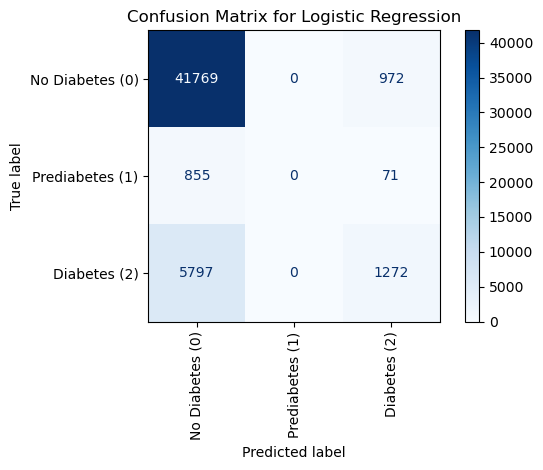

================== Evaluation for: Random Forest ==================

Classification Report (Test Set):
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.97      0.91     42741
Prediabetes (1)       0.03      0.00      0.00       926
   Diabetes (2)       0.48      0.19      0.27      7069

       accuracy                           0.84     50736
      macro avg       0.46      0.39      0.40     50736
   weighted avg       0.79      0.84      0.81     50736



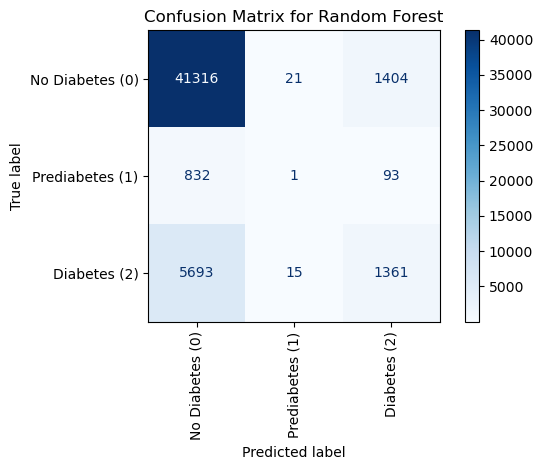

================== Evaluation for: K-Nearest Neighbors ==================

Classification Report (Test Set):
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.96      0.91     42741
Prediabetes (1)       0.00      0.00      0.00       926
   Diabetes (2)       0.45      0.21      0.28      7069

       accuracy                           0.84     50736
      macro avg       0.44      0.39      0.40     50736
   weighted avg       0.79      0.84      0.81     50736



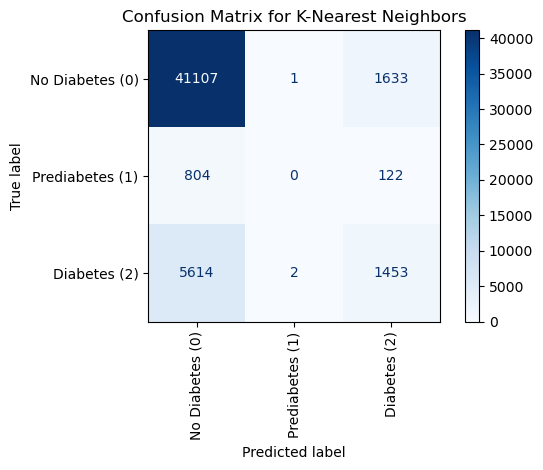

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# get the best estimators from the GridSearchCV objects
best_rf_model = rf_grid.best_estimator_
best_knn_model = knn_grid.best_estimator_
best_log_model = log_grid.best_estimator_

# generate predictions on the unseen test set
y_pred_rf = best_rf_model.predict(X_test_processed)
y_pred_knn = best_knn_model.predict(X_test_processed)
y_pred_log = best_log_model.predict(X_test_processed)

# creat dict to hold model results
models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "K-Nearest Neighbors": y_pred_knn
}

# define class labels for clear reporting
target_names = ['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']

# loop through each modeland display its evaluation results
for model_name, y_pred in models.items():
    print(f"================== Evaluation for: {model_name} ==================")

    # Classification Report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred, target_names=target_names, digits=2))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()
    plt.show()


### 1. Logistic Regression Analysis

*   **Best Model:** LogisticRegression(C=10, fit_intercept=True, max_iter=5000)
*   **Best Score (Weighted F1):** 0.8106 (from cross-validation)

**Bias-Variance:**
*   **Training Score:** 0.8105
*   **Cross-Validation Score:** 0.8106
The training and cross-validation scores are almost identical. This shows a really good bias-variance balance, saying that the model is very stable and generalizes without overfitting; a sign of a robust model.

**Quality and Performance on Test Set:**
```text
Classification Report (Test Set):
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.98      0.92     42741
Prediabetes (1)       0.00      0.00      0.00       926
   Diabetes (2)       0.55      0.18      0.27      7069
```
The evaluation shows an important thing that despite its stability, the model's clinical quality is poor. The **Recall for "Prediabetes" is 0.00%**. The confusion matrix shows the model **never predicted "Prediabetes" a single time**. It learned that ignoring this rare case was the best strategy to maximize its overall score. The Recall for "Diabetes" (18%) is also too low for practical use. This shows that even a stable model can fail when it has to deal with learge class imbalance, as it becomes biased towards the dominant class.

---

### 2. Random Forest Analysis

*   **Best Model:** RandomForestClassifier(max_depth=20, n_estimators=100)
*   **Best Score (Weighted F1):** 0.8067 (from cross-validation)

**Bias-Variance:**
*   **Training Score:** 0.9012
*   **Cross-Validation Score:** 0.8067
The 10-point gap between the training and validation scores clearly shows **overfitting (high variance)**. The model learned the specifics of the training data too well, including the noise, which affected its ability to adapt to the unseen test data.

**Quality and Performance on Test Set:**
```text
Classification Report (Test Set):
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.97      0.91     42741
Prediabetes (1)       0.03      0.00      0.00       926
   Diabetes (2)       0.48      0.19      0.27      7069
```
The Random Forest model struggled even more than the Logistic Regression. It correctly identified only **one** prediabetic individual out of 926, which resulted in a recall of basically 0.00%. Its recall for the "Diabetes" class (19%) was also bad. The model's overfitting stopped it from getting the signals of the minority classes, making it not very suitable for this problem.

---

### 3. K-Nearest Neighbors Analysis

*   **Best Model:** KNeighborsClassifier(n_neighbors=7)
*   **Best Score (Weighted F1):** 0.8046 (from cross-validation)

**Bias-Variance Diagnosis:**
*   **Training Score:** 0.8345
*   **Cross-Validation Score:** 0.8046
A 3-point gap between scores suggests **slight overfitting**. The model generalizes better than the Random Forest model but is not as stable as Logistic Regression.

**Quality and Performance on Test Set:**
```text
Classification Report (Test Set):
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.96      0.91     42741
Prediabetes (1)       0.00      0.00      0.00       926
   Diabetes (2)       0.45      0.21      0.28      7069
```
Similar to Logistic Regression, KNN completely failed to identify the "Prediabetes" class, posting a **0.00% recall**. While it got the highest recall for the "Diabetes" class (21%), this is still too low to be clinically meaningful. The model's quality is undermined by its inability to handle the imbalanced class distribution.

# Question 8

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


#### **Potential Impacts of the Solution**

The analysis in Question 7 showed that the models, in their current state, are not very suitable for deploying. The overall poor performance, especially the **failure to identify the "Prediabetes" class**, means the solution would do more harm than good.

*   **Who Would Be Negatively Affected?**
    *   **Patients/Individuals:** The primary group affected would be individuals who have prediabetes or diabetes but are classified as healthy (a false negative). This would create a false sense of security, causing them to miss the window for early intervention, lifestyle changes, and medical treatment, leading to more severe health problems.
    *   **Healthcare System:** While it might seem like the system would save money by avoiding follow-ups for false positives, the long-term cost of treating advanced, unmanaged diabetes is far greater than the cost of early screening and management.

*   **Who Would Benefit (If the Model Were Improved)?**
    If the model's performance issues were fixed, the benefactors would be:
    *   **Patients:** An accurate tool could alert patients to their risk early, allowing them to seek care and make preventative lifestyle changes.
    *   **Public Health Officials:** A reliable model would provide a tool for population-level health monitoring, allowing for targeted health campaigns and focused resources.
    *   **Healthcare Providers & Insurers:** Proactive and preventative care is more effective and less costly than managing chronic, advanced disease.

---
#### **Concerns and Analysis of Algorithmic Bias**

Given that we're analyzing sensitive health data that includes demographic and features like **Age** and **Income**, there is a big risk of algorithmic bias. This happnes when a model's performance is not equal for different demographic groups, amplifying existing societal inequities. A biased model could, for example, be less effective at identifying diabetes in low-income individuals, disadvantaging an already vulnerable population.

To see this, we'll analyze the best-performing model (Logistic Regression) for bias related to **Income**.


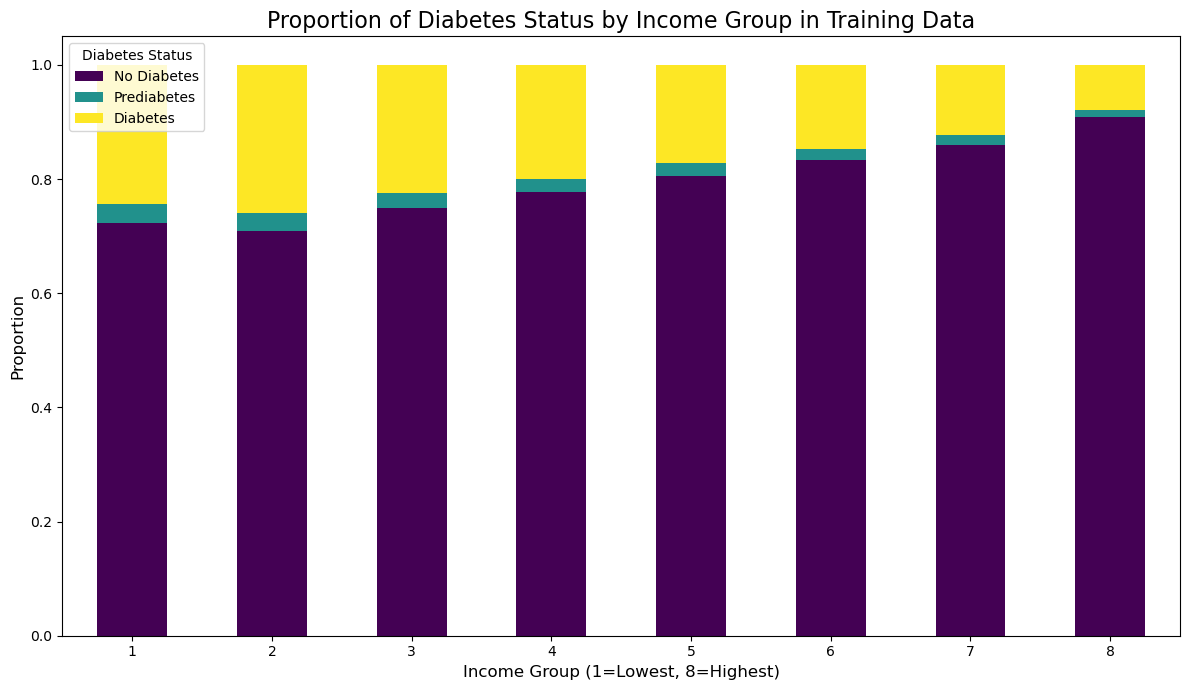

In [85]:
# create df from the original training data
train_df = X_train.copy()
train_df['Diabetes_012'] = y_train

# create a cross-tab of Income and Diabetes status, normalized by row
income_bias_crosstab = pd.crosstab(train_df['Income'], train_df['Diabetes_012'], normalize='index')

# rename columnns
income_bias_crosstab.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# plot the data
income_bias_crosstab.plot(kind='bar',
                          stacked=True,
                          figsize=(12, 7),
                          colormap='viridis',
                          rot=0)

plt.title('Proportion of Diabetes Status by Income Group in Training Data', fontsize=16)
plt.xlabel('Income Group (1=Lowest, 8=Highest)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.show()


**1. Bias in the Training Data**

**Thorough Analysis:**
This visualization reveals a concerning and consistent trend that shows real-world health disparities. There is a **strong, inverse correlation between income level and the amount of diabetes**.

*   **Low-Income Groups (1-3):** These groups have the highest proportion of "Diabetes" (yellow) and "Prediabetes" (teal). For example, in Income Group 2, nearly 30% of the poeple have either diabetes or prediabetes.
*   **High-Income Groups (7-8):** These groups have the lowest proportion of the disease. In Income Group 8, people with "No Diabetes" (purple) make up approximately 90% of the population.

This is a classic example of **societal bias being present in the data**. The data accurately shows that lower income is a risk factor for diabetes. The danger is that a machine learning model might not only learn this correlation but also perform differently across these groups, leading to algorithmic bias.

/var/folders/j6/sg1vtjtn51g0yk2lj2zjvw8m0000gn/T/ipykernel_91387/3074070592.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recall_by_income = results_df.groupby('Income').apply(


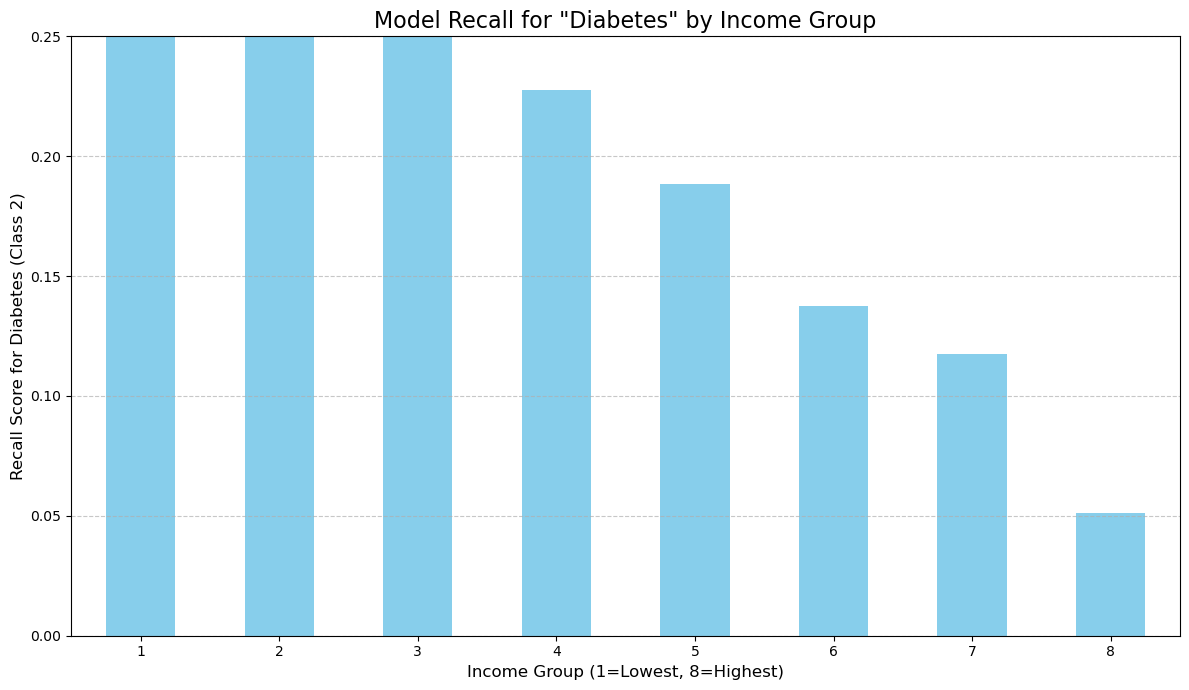

In [87]:
from sklearn.metrics import recall_score

# create a df with test features, true labels, and predictions
results_df = X_test.copy()
results_df['true_label'] = y_test
results_df['predicted_label'] = best_log_model.predict(X_test_processed)

# calc recall for Diabetes for each income group
recall_by_income = results_df.groupby('Income').apply(
    lambda x: recall_score(x['true_label'], x['predicted_label'], labels=[2], average='macro', zero_division=0)
)

# plot the results
recall_by_income.plot(kind='bar',
                      figsize=(12, 7),
                      color='skyblue',
                      rot=0)

plt.title('Model Recall for "Diabetes" by Income Group', fontsize=16)
plt.xlabel('Income Group (1=Lowest, 8=Highest)', fontsize=12)
plt.ylabel('Recall Score for Diabetes (Class 2)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 0.25) # Set y-limit to better see the differences
plt.tight_layout()
plt.show()

**2. Visualizing Bias in Model Predictions**

**Thorough Analysis:**
This visualization of the Logistic Regression model's performance on the test set is very important. It shows the model's **Recall** for the "Diabetes" class, broken down by income group. The results show a clear performance bias.

*   **Highest Recall in Low-Income Groups:** The model's ability to correctly identify diabetic individuals is **best for the lowest income groups**. Groups 1, 2, and 3 have the highest recall score, reaching 0.25 (or 25%).
*   **Steep Decline in Performance:** As income increases, the model's performance drops precipitously. For Income Group 6, the recall is below 15%, and for the highest income group (8), the recall is a dismal 5%.

**Connecting the Two Graphs:** This might seem counterintuitive at first, but the two graphs explain each other perfectly. The model is better at identifying diabetes in low-income individuals precisely because, as the first graph showed, **diabetes is far more common in that population**. The model had a much larger and richer set of examples of "low-income + diabetic" individuals to learn from, allowing it to identify a (still poor) 25% of them.

On the other hand, the combination of "high-income + diabetic" is a much rarer event in the dataset. With fewer examples to learn from, the model failed to generalize and identify this subgroup, resulting in the extremely poor recall of 5%. The model is effectively **underfitting on the high-income diabetic due to a lack of data**. This is a serious form of algorithmic bias where the model inadvertently provides a lower standard of performance for a specific group.

---
#### **Recommendations to Address Issues**

The analysis confirms two major issues: 1) overall poor performance due to severe class imbalance, and 2) algorithmic bias where performance varies unfairly across income groups.

1.  **Address Class Imbalance (To Improve Overall Recall):**

   
    *   **Implement Resampling:** The most effective approach would be to use resampling on the training data. This would create newly created examples of the "Prediabetes" and "Diabetes" classes, giving the model a balanced dataset to train on and a better opportunity to learn their distinguishing features.
    *   **Use Class Weights:** As a first step, implement class_weight='balanced' in the model parameters. This forces the algorithm to place a higher penalty on misclassifying the rare classes, encouraging it to improve its recall for them.

3.  **Address Algorithmic Bias (To Improve Fairness):** 
    *   **Group-Aware Resampling:** The bias analysis showed the model underperforms on high-income diabetics because they are a "minority within a minority." Instead of applying SMOTE blindly, use it strategically to **increase the number of examples in underperforming subgroups**, such as "Income Group 8 + Diabetes". This makes sure the model gets enough data to learn the patterns specific to that group.
    *   **Evaluate with Fairness Metrics:** The modeling process should alsoinclude fairness auditing. Beyond the F1-score, track metrics like **Equalized Odds**, which checks if the recall (True Positive Rate) is equal across all income groups. The goal would be to tune a model that not only has high overall recall but also has a *consistent* recall across groups like income.

## References:

1) https://encord.com/blog/f1-score-in-machine-learning/